#  US Local Area Unemployment Statistics 

This data is provided by [MS Azure open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/catalog/). Further information about the meanings and details of the dataset is given [here](https://download.bls.gov/pub/time.series/la/).\
This csv file is bigger than 2 GB, so that file cannot be provided. Please refer to the URL of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from azureml.opendatasets import UsLaborLAUS
#usLaborLAUS = UsLaborLAUS()
#usLaborLAUS_df = usLaborLAUS.to_pandas_dataframe()
#usLaborLAUS_df.to_csv('usumeployment.csv', index=False)

In [3]:
data = pd.read_csv('usumeployment.csv')
data.head(5)

,area_code,area_type_code,srd_code,measure_code,series_id,year,period,value,footnote_codes,seasonal,series_title,measure_text,srd_text,areatype_text,area_text
0,CA3653200000000,E,36,3,LAUCA365320000000003,2000,M01,4.7,NaN,U,"Unemployment Rate: Syracuse-Auburn, NY Combine...",unemployment rate,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
1,CA3653200000000,E,36,3,LAUCA365320000000003,2000,M02,4.7,NaN,U,"Unemployment Rate: Syracuse-Auburn, NY Combine...",unemployment rate,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
2,CA3653200000000,E,36,3,LAUCA365320000000003,2000,M03,4.2,NaN,U,"Unemployment Rate: Syracuse-Auburn, NY Combine...",unemployment rate,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
3,CA3653200000000,E,36,3,LAUCA365320000000003,2000,M04,3.6,NaN,U,"Unemployment Rate: Syracuse-Auburn, NY Combine...",unemployment rate,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
4,CA3653200000000,E,36,3,LAUCA365320000000003,2000,M05,3.6,NaN,U,"Unemployment Rate: Syracuse-Auburn, NY Combine...",unemployment rate,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12289052 entries, 0 to 12289051
Data columns (total 15 columns):
area_code         object
area_type_code    object
srd_code          int64
measure_code      int64
series_id         object
year              int64
period            object
value             float64
footnote_codes    object
seasonal          object
series_title      object
measure_text      object
srd_text          object
areatype_text     object
area_text         object
dtypes: float64(1), int64(3), object(11)
memory usage: 1.4+ GB


## Info about the data

This data is voluminous. It includes the total values of employment and unemployment, workforce and umemployment rate. First, we'll try to reduce the quantity to what we need.
- The period details from M01 to M12 give us the months whereas M13 gives us the annual average. We only look at annual data, so we only need data marked as **M13**.
- In this case, only the unemployment rate is important, thus every other rows can be removed.
- Then, we do not longer need the columns **measure_text** as well as **series_title** and **period**. The column **srd_code** represents the state in code with two digits, for simplicity we'll go by state name and remove the column for the code.
- The column **measure_code** is equivalent to the column **measure_text** (unemployment rate), so we can remove this column, too.

In [6]:
data = data[(data['measure_text']=='unemployment rate') & (data['period']=='M13')]

In [8]:
data.drop(['series_title', 'measure_text', 'period', 'srd_code', 'measure_code'], axis=1, inplace=True)

We have to remember that we deal with **local areas**. Thus, we have to be very specific about what data we look for.\
If we want to look for data of the **entire state** (statewide), either we look for **A** in **area_type_code** or **Statewide** in **areatype_text**.

## Question: Can we look for the data for New York City and Los Angeles and plot a diagram?

### How can we find New York City?

In [9]:
data.head(5)

,area_code,area_type_code,series_id,year,value,footnote_codes,seasonal,srd_text,areatype_text,area_text
12,CA3653200000000,E,LAUCA365320000000003,2000,3.8,NaN,U,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
25,CA3653200000000,E,LAUCA365320000000003,2001,4.3,NaN,U,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
38,CA3653200000000,E,LAUCA365320000000003,2002,5.1,NaN,U,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
51,CA3653200000000,E,LAUCA365320000000003,2003,5.5,NaN,U,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"
64,CA3653200000000,E,LAUCA365320000000003,2004,5.4,NaN,U,New York,Combined areas,"Syracuse-Auburn, NY Combined Statistical Area"


**New York** as well as Los Angeles are neither counties nor small towns. Let's see if we can find them through the column **areatype_text** or **area_type_code**.

In [16]:
types = pd.Series(data['areatype_text'].values, index=data['area_type_code'].values).drop_duplicates()
types

E                                       Combined areas
F                             Counties and equivalents
H    Cities and towns below 25,000 population in Ne...
G             Cities and towns above 25,000 population
C                               Metropolitan divisions
K                 Intrastate parts of interstate areas
D                                   Micropolitan areas
B                                   Metropolitan areas
I         Parts of cities that cross county boundaries
J                Multi-entity small labor market areas
N                                     Census divisions
A                                            Statewide
L                               Balance of state areas
M                                       Census regions
dtype: object

Let's try **Cities and towns above 25,000 population** in the state of New York for the year 2000.

In [17]:
data[(data['srd_text']=='New York') & (data['year']==2000) & (data['area_type_code']=='G')]

,area_code,area_type_code,series_id,year,value,footnote_codes,seasonal,srd_text,areatype_text,area_text
267335,CS3632765000000,G,LAUCS363276500000003,2000,4.1,NaN,U,New York,"Cities and towns above 25,000 population","Haverstraw town, NY"
446000,CS3631104000000,G,LAUCS363110400000003,2000,2.7,NaN,U,New York,"Cities and towns above 25,000 population","Guilderland town, NY"
447705,CS3650045000000,G,LAUCS365004500000003,2000,3.2,NaN,U,New York,"Cities and towns above 25,000 population","Newburgh town, NY"
501844,CS3645029000000,G,LAUCS364502900000003,2000,2.9,NaN,U,New York,"Cities and towns above 25,000 population","Manlius town, NY"
694672,CT3627485000000,G,LAUCT362748500000003,2000,4.1,NaN,U,New York,"Cities and towns above 25,000 population","Freeport village, NY"
...,...,...,...,...,...,...,...,...,...,...
11389088,CS3612529000000,G,LAUCS361252900000003,2000,2.9,NaN,U,New York,"Cities and towns above 25,000 population","Carmel town, NY"
11713486,CT3675484000000,G,LAUCT367548400000003,2000,4.3,NaN,U,New York,"Cities and towns above 25,000 population","Troy city, NY"
11772894,CT3678608000000,G,LAUCT367860800000003,2000,5.1,NaN,U,New York,"Cities and towns above 25,000 population","Watertown city, NY"
11899336,CS3621820000000,G,LAUCS362182000000003,2000,3.2,NaN,U,New York,"Cities and towns above 25,000 population","Eastchester town, NY"


That is still too much data but we can identify Troy **city** and Watertown **city**.

In [19]:
data[(data['srd_text']=='New York') & (data['year']==2000) & (data['area_type_code']=='G') & (data['area_text']=='New York city, NY')]

,area_code,area_type_code,series_id,year,value,footnote_codes,seasonal,srd_text,areatype_text,area_text
9949659,CT3651000000000,G,LAUCT365100000000003,2000,5.8,NaN,U,New York,"Cities and towns above 25,000 population","New York city, NY"


There it is! Here, we need to be precise about **New York city** because the .isin() function does not accept approximations or abbreviations or we write a specific function in which we would check if **city** is in that row/string.

In [20]:
data_ny = data[data['area_text']=='New York city, NY']
ny = pd.Series(data_ny['value'].values, index=data_ny['year']).sort_index()

Now for **Los Angeles**

In [21]:
data[(data['srd_text']=='California') & (data['year']==2000) & (data['areatype_text']=='Cities and towns above 25,000 population') & (data['area_text']=='Los Angeles city, CA')]

,area_code,area_type_code,series_id,year,value,footnote_codes,seasonal,srd_text,areatype_text,area_text
11129487,CT0644000000000,G,LAUCT064400000000003,2000,6.0,NaN,U,California,"Cities and towns above 25,000 population","Los Angeles city, CA"


In [22]:
data_la = data[data['area_text']=='Los Angeles city, CA']
la = pd.Series(data_la['value'].values, index=data_la['year']).sort_index()

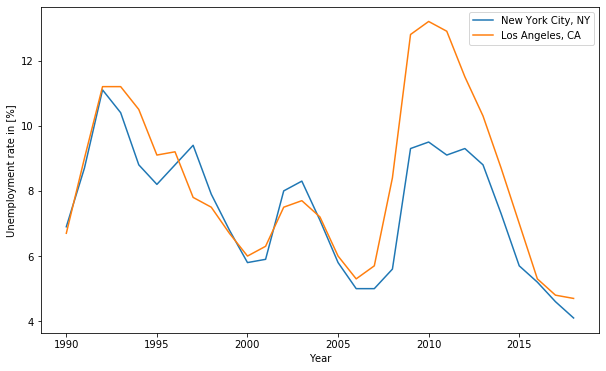

In [23]:
fig = plt.figure(figsize=(10,6))
#ax = fig.subplots
plt.plot(ny, label='New York City, NY')
plt.plot(la, label='Los Angeles, CA')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Unemployment rate in [%]')
plt.show()

We can see that the unemployment rates show similar structure but for LA, it has been higher between 2005 and about 2016. Reasons could be:
- Financial instability in LA
- Environmental laws that might make it harder for companies in LA
- Specific and highly specialized industries which wipe out other industries due to expensive property in LA

## Question: Can we compare the unemployment rate of each state in 1995 and 2015 in one diagram?

First of all, we can reduce our data to only two specific years and statewide views.

In [24]:
data2 = data[((data['year']==1995) | (data['year']==2015)) & (data['area_type_code']=='A')]
data2.head(6)

,area_code,area_type_code,series_id,year,value,footnote_codes,seasonal,srd_text,areatype_text,area_text
398908,ST4500000000000,A,LAUST450000000000003,2015,6.0,NaN,U,South Carolina,Statewide,South Carolina
398967,ST4500000000000,A,LAUST450000000000003,1995,5.2,NaN,U,South Carolina,Statewide,South Carolina
978840,ST1900000000000,A,LAUST190000000000003,2015,3.8,NaN,U,Iowa,Statewide,Iowa
978899,ST1900000000000,A,LAUST190000000000003,1995,3.4,NaN,U,Iowa,Statewide,Iowa
1161267,ST1600000000000,A,LAUST160000000000003,2015,4.2,NaN,U,Idaho,Statewide,Idaho
1161326,ST1600000000000,A,LAUST160000000000003,1995,5.4,NaN,U,Idaho,Statewide,Idaho


That works fine. Now, we can remove all columns that we don't need.

In [25]:
data2 = data2.drop(['area_code', 'area_type_code', 'series_id', 'footnote_codes', 'seasonal', 'srd_text', 'areatype_text'], axis=1)

In [27]:
res = data2.groupby(['area_text', 'year'])['value'].mean()
res_df=(res.to_frame().unstack())['value']
res_df.head(6)

year,1995,2015
area_text,,
Alabama,6.0,6.1
Alaska,7.3,6.5
Arizona,5.3,6.1
Arkansas,4.8,5.0
California,7.9,6.2
Colorado,4.0,3.9


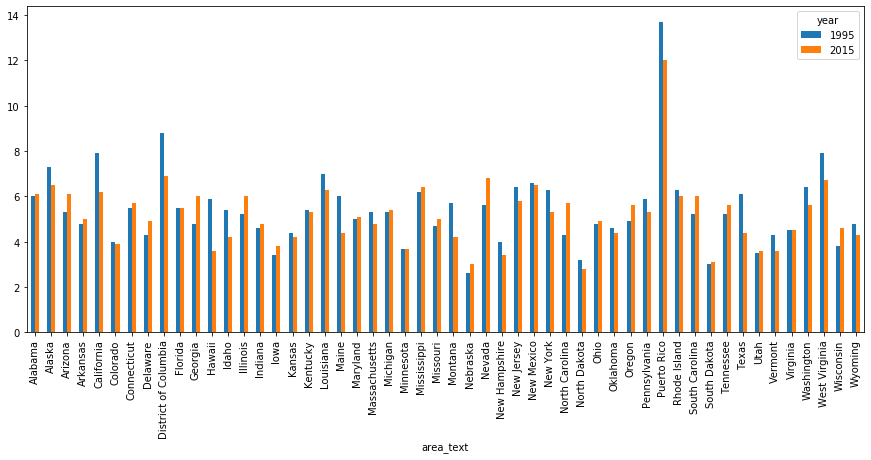

In [28]:
res_df.plot(kind='bar', figsize=(15, 6))
plt.show()

We can see that the unemployment rate for each state when only comparing 1995 and 2015 is very stable. We can see a high decrease in California, District of Columbia and Puerto Rico although the latter two are not states. We can also see an increase of unemployment in Illinois, Nevada, North Carolina.
- We have to keep in mind that we only look at relative numbers here.
- Illinois has financial trouble, especially in cities like Chicago where the unemployment rate increased
- Nevada might have experienced an increase of inhabitants and is highly specified on certain industries. Furthermore Las Vegas and Reno are in high demand for water which makes farming harder
- North Carolina might have problems with outsourcing industries